# U.S. Medical Insurance Costs

# Multiple Regression Analysis on Insurance Data

## Introduction

The purpose of this project is to perform a multiple regression analysis on a dataset of insurance charges. Regression analysis is a statistical technique used to understand the relationship between one dependent variable (in this case, `charges`) and multiple independent variables (e.g., `age`, `bmi`, `children`, etc.). 

Through this project, we aim to:
1. Explore the dataset to understand the variables and their relationships.
2. Preprocess the data to ensure it is ready for analysis.
3. Build and evaluate a multiple regression model to predict medical insurance charges.
4. Interpret the results and provide insights into factors influencing insurance charges.

This notebook is structured as follows:
1. Data Import and Inspection
2. Data Preprocessing
3. Exploratory Data Analysis
4. Model Building
5. Results and Interpretation
6. Conclusion


In [50]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.graphics.regressionplots import plot_partregress_grid
import scipy.stats as stats
from scipy.stats import boxcox

## Data Import and Inspection

To begin, we import the insurance dataset and inspect its structure. This helps us understand the data types, missing values, and general layout.

The dataset has the following columns:
1. **age**: Age of the individual.
2. **sex**: Gender of the individual (male, female).
3. **bmi**: Body mass index.
4. **children**: Number of children/dependents.
5. **smoker**: Smoking status (yes, no).
6. **region**: Geographic region.
7. **charges**: Medical insurance charges.


In [4]:
insurance_data =pd.read_csv(r"C:\Users\EWURA\Desktop\Machine Learning Journey\insurance.csv")
insurance_data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [5]:
# Inspect the dataset
insurance_data.head()
insurance_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


## Exploratory Data Analysis

In [6]:
insurance_data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


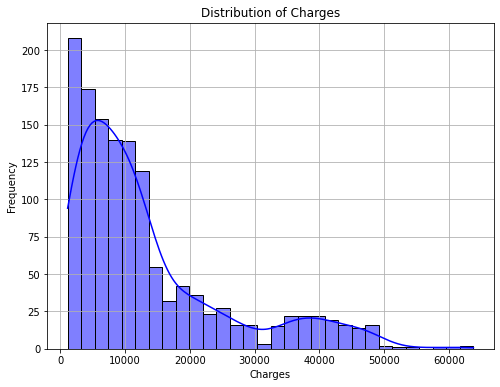

In [7]:
# Plot histogram for charges
plt.figure(figsize=(8, 6))
sns.histplot(insurance_data['charges'], kde=True, color='blue')
plt.title('Distribution of Charges')
plt.xlabel('Charges')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

### Distribution of Charges

The histogram below illustrates the distribution of insurance charges in the dataset. The distribution is right-skewed, indicating that most individuals incur lower insurance charges, with a smaller proportion having significantly higher charges.



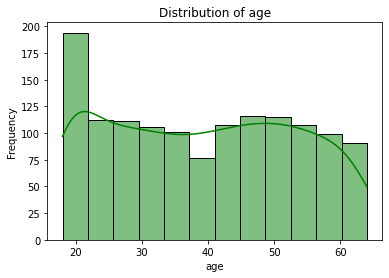

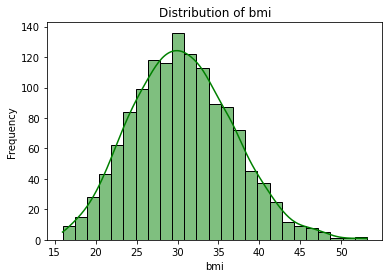

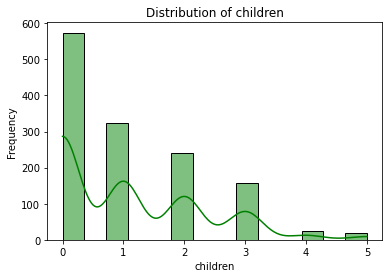

In [8]:
# Plot distributions
numerical_columns = ['age', 'bmi', 'children']
for col in numerical_columns:
    plt.figure(figsize=(6, 4))
    sns.histplot(insurance_data[col], kde=True, color='green')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()


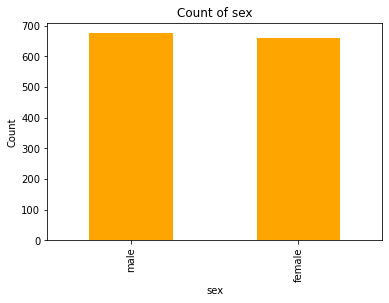

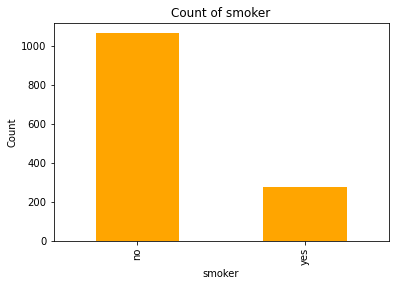

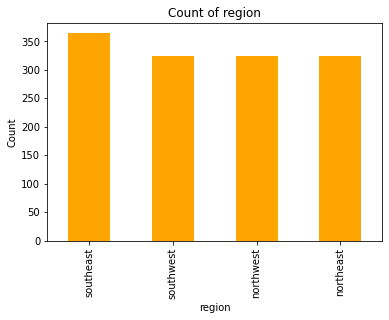

In [9]:
# Plot bar charts for categorical variables
categorical_columns = ['sex', 'smoker', 'region']
for col in categorical_columns:
    plt.figure(figsize=(6, 4))
    insurance_data[col].value_counts().plot(kind='bar', color='orange')
    plt.title(f'Count of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.show()


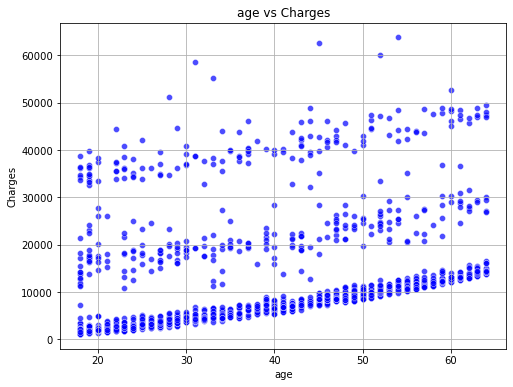

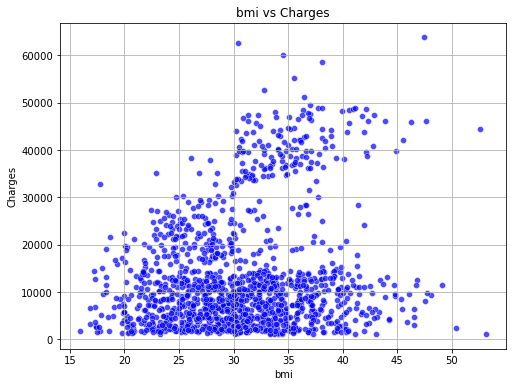

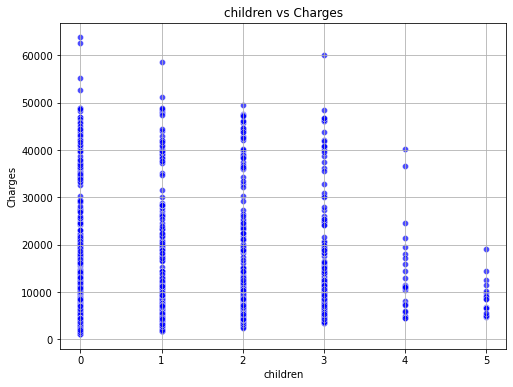

In [10]:
# Scatter plots for numerical variables against charges
numerical_columns = ['age', 'bmi', 'children']
for col in numerical_columns:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(data=insurance_data, x=col, y='charges', alpha=0.7, color='blue')
    plt.title(f'{col} vs Charges')
    plt.xlabel(col)
    plt.ylabel('Charges')
    plt.grid(True)
    plt.show()


### Age vs. Charges

This scatterplot shows the relationship between age and insurance charges. As age increases, there is a noticeable upward trend in charges, suggesting that older individuals tend to incur higher medical insurance costs. 

### BMI vs. Charges

This scatterplot illustrates the relationship between body mass index (BMI) and charges. While there is no strong linear trend, individuals with higher BMI values tend to have more variability in charges, particularly for higher values. 

### Number of Children vs. Charges

This scatterplot shows the number of children and their relationship with charges. There is no clear trend between the number of children and charges, suggesting that the number of dependents may have a minimal direct impact on medical costs. 



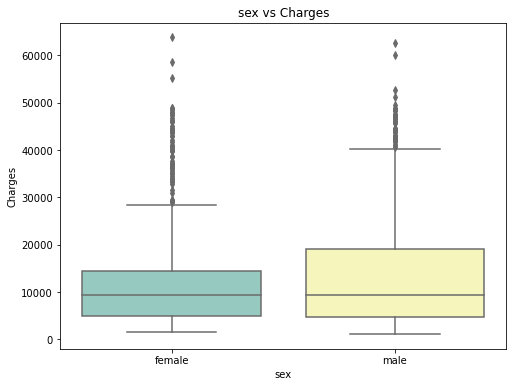

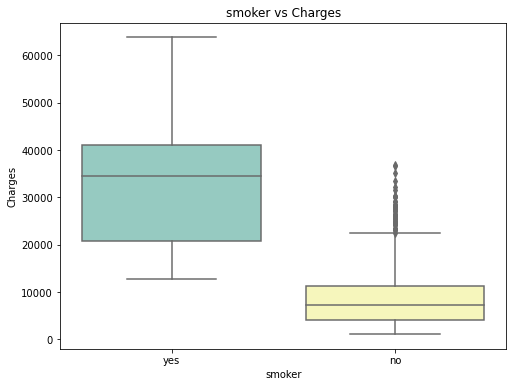

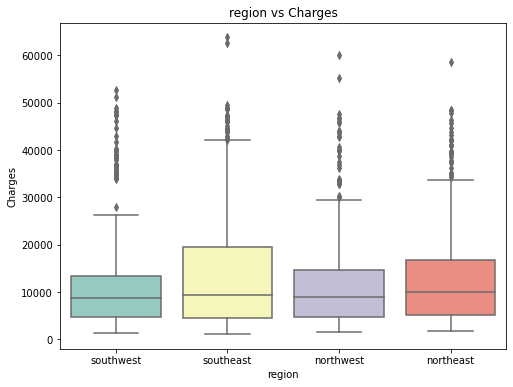

In [11]:
# Boxplots for charges by categorical variables
categorical_columns = ['sex', 'smoker', 'region']
for col in categorical_columns:
    plt.figure(figsize=(8, 6))
    sns.boxplot(data=insurance_data, x=col, y='charges', palette='Set3')
    plt.title(f'{col} vs Charges')
    plt.xlabel(col)
    plt.ylabel('Charges')
    plt.show()

### Charges by Sex

This boxplot compares insurance charges between males and females. Both distributions are similar in terms of median charges. However, the presence of outliers indicate some high-charge individuals in both groups.





### Charges by Smoking Status

This boxplot illustrates the relationship between smoking status and insurance charges. Smokers have significantly higher median charges and a much wider distribution compared to non-smokers. 

### Charges by Region

This boxplot shows the distribution of insurance charges across four geographic regions. While the medians are relatively similar, the spread of charges varies slightly. Notably, all regions exhibit outliers, indicating individuals with exceptionally high charges. 


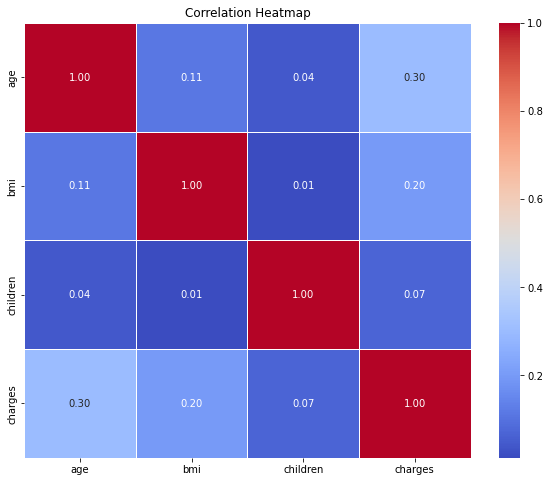

In [12]:
# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(insurance_data.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


### Correlation Heatmap

This heatmap shows the pairwise correlations between numerical variables in the dataset. The values range from -1 to 1, where:
- Positive values indicate a direct relationship (e.g., age and charges have a moderate positive correlation of 0.30).
- Near-zero values indicate no strong linear relationship (e.g., BMI and age are weakly correlated).
- This heatmap helps identify predictors that may influence charges.


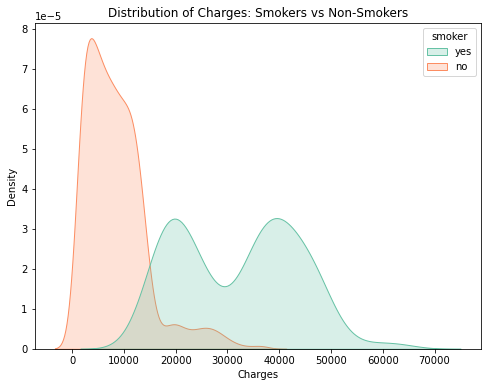

In [13]:
# Density plot for smokers vs. non-smokers
plt.figure(figsize=(8, 6))
sns.kdeplot(data=insurance_data, x='charges', hue='smoker', fill=True, common_norm=False, palette='Set2')
plt.title('Distribution of Charges: Smokers vs Non-Smokers')
plt.xlabel('Charges')
plt.ylabel('Density')
plt.show()

### Charges Distribution: Smokers vs Non-Smokers

This density plot compares the distribution of charges between smokers and non-smokers:
- Smokers have a wider and higher range of charges, indicating significantly higher medical insurance costs.
- Non-smokers have a narrower and lower range of charges.
This visualization highlights the strong influence of smoking on medical expenses.


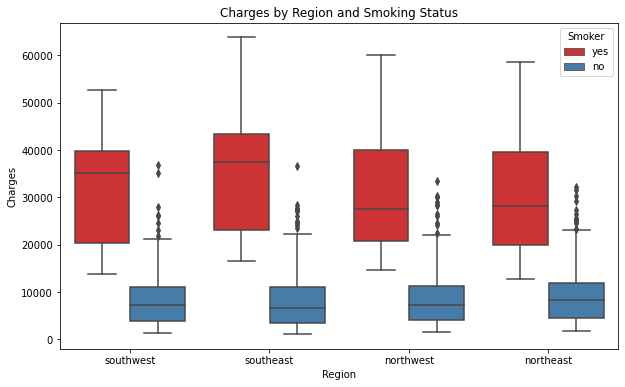

In [14]:
# Grouped boxplot: Charges by region and smoker
plt.figure(figsize=(10, 6))
sns.boxplot(data=insurance_data, x='region', y='charges', hue='smoker', palette='Set1')
plt.title('Charges by Region and Smoking Status')
plt.xlabel('Region')
plt.ylabel('Charges')
plt.legend(title='Smoker')
plt.show()

### Charges by Region and Smoking Status

This grouped boxplot compares insurance charges across different regions for smokers and non-smokers:
- In all regions, smokers consistently have higher charges than non-smokers.
- Regional differences in charges are less pronounced compared to the smoking effect.
- This suggests smoking is a dominant factor influencing insurance charges.


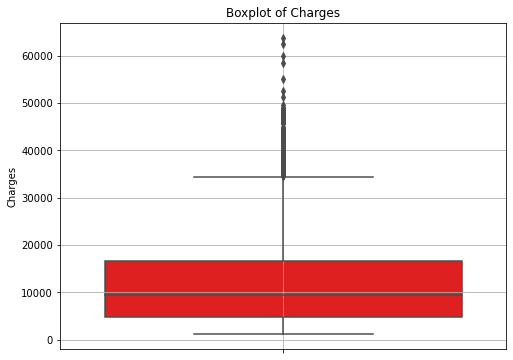

In [17]:
# Boxplot for charges
plt.figure(figsize=(8, 6))
sns.boxplot(data=insurance_data, y='charges', color='red')
plt.title('Boxplot of Charges')
plt.ylabel('Charges')
plt.grid(True)
plt.show()


### Outliers in Charges

This boxplot displays the distribution of insurance charges to identify potential outliers:
- Most charges are concentrated in a lower range, with a few extremely high values acting as outliers.
- These outliers may represent individuals with high-risk factors or severe medical conditions.
This insight helps in understanding the spread of charges and identifying influential data points.


## Model Building and Diagnostics

In [18]:
# Assuming 'insurance_data' is your dataset

#Convert categorical variables to dummy variables
data_encoded = pd.get_dummies(insurance_data, drop_first=True)

#Define the response variable and predictors
X = data_encoded.drop(columns=['charges'])  # All predictors
y = data_encoded['charges']  # Response variable

#Add a constant to include the intercept in the model
X = sm.add_constant(X)

# Fit the Ordinary Least Squares (OLS) model
full_model = sm.OLS(y, X).fit()

# Display the model summary
print(full_model.summary())

# Extract coefficients and other metrics into a DataFrame
model_summary_df = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': full_model.params,
    'P-value': full_model.pvalues
}).reset_index(drop=True)

print(model_summary_df)


                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.751
Model:                            OLS   Adj. R-squared:                  0.749
Method:                 Least Squares   F-statistic:                     500.8
Date:                Tue, 03 Dec 2024   Prob (F-statistic):               0.00
Time:                        12:37:03   Log-Likelihood:                -13548.
No. Observations:                1338   AIC:                         2.711e+04
Df Residuals:                    1329   BIC:                         2.716e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const            -1.194e+04    987.819  

## Multiple Regression Model Results

### Key Findings

The regression model includes several predictors for insurance charges (`charges`). Below is a summary of their statistical significance and interpretation:

---

### **Significant Predictors (\(p < 0.05\))**

1. **Age** (\(p < 0.001\)):
   - Charges increase by \$256.86 for every additional year of age.
2. **BMI** (\(p < 0.001\)):
   - For each one-unit increase in BMI, charges increase by \$339.19.
3. **Children** (\(p = 0.0006\)):
   - Each additional child is associated with \$475.50 higher charges.
4. **Smoker (Yes)** (\(p < 0.001\)):
   - Smokers incur \$23,848.53 more in charges compared to non-smokers, making this the most influential predictor.
5. **Region (Southeast)** (\(p = 0.031\)):
   - Charges in the Southeast are \$1035.02 lower than in the Northeast.
6. **Region (Southwest)** (\(p = 0.045\)):
   - Charges in the Southwest are \$960.05 lower than in the Northeast.

---

### **Non-Significant Predictors (\(p \geq 0.05\))**

1. **Sex (Male)** (\(p = 0.693\)):
   - No significant difference in charges between males and females.
2. **Region (Northwest)** (\(p = 0.459\)):
   - No significant difference in charges between the Northwest and the Northeast.

---




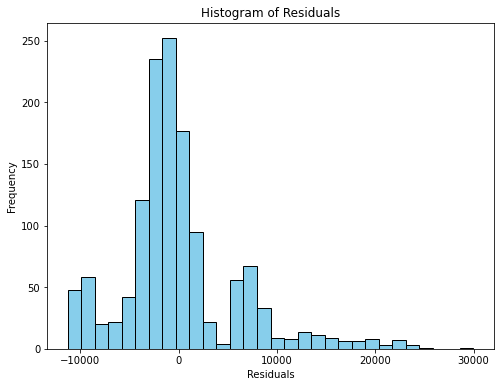

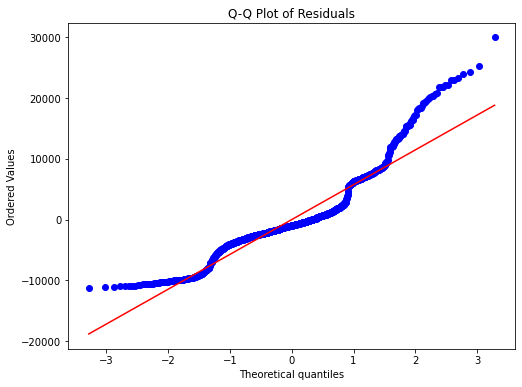

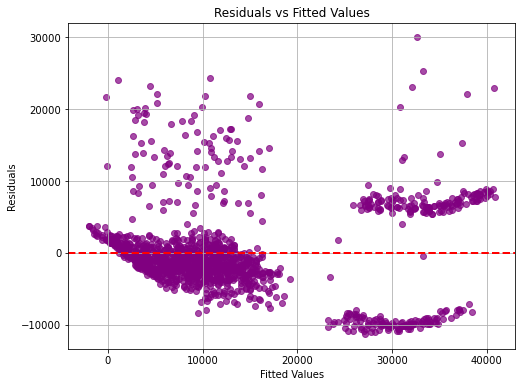

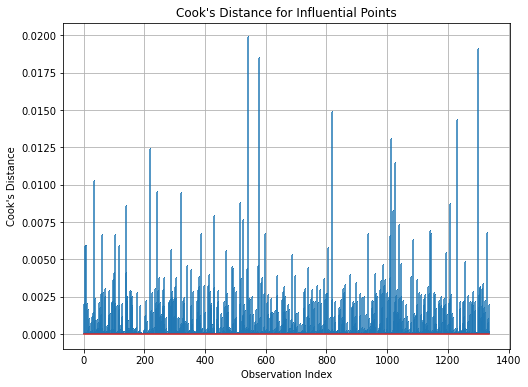

Variance Inflation Factor (VIF):
           Variable        VIF
0             const  35.527488
1               age   1.016822
2               bmi   1.106630
3          children   1.004011
4          sex_male   1.008900
5        smoker_yes   1.012074
6  region_northwest   1.518823
7  region_southeast   1.652230
8  region_southwest   1.529411
eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1


<Figure size 864x576 with 0 Axes>

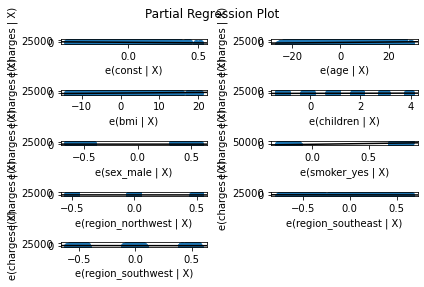

In [20]:
# Residuals and fitted values
residuals = full_model.resid
fitted_values = full_model.fittedvalues

# 1. Residual Normality
# Histogram of residuals
plt.figure(figsize=(8, 6))
plt.hist(residuals, bins=30, edgecolor='k', color='skyblue')
plt.title('Histogram of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

# Q-Q plot
plt.figure(figsize=(8, 6))
stats.probplot(residuals, dist="norm", plot=plt)
plt.title('Q-Q Plot of Residuals')
plt.show()

# 2. Homoscedasticity
# Residuals vs Fitted Values
plt.figure(figsize=(8, 6))
plt.scatter(fitted_values, residuals, alpha=0.7, color='purple')
plt.axhline(0, color='red', linestyle='--', linewidth=2)
plt.title('Residuals vs Fitted Values')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.grid(True)
plt.show()

# 3. Influential Points
# Cook's Distance
influence = full_model.get_influence()
cooks_d = influence.cooks_distance[0]

plt.figure(figsize=(8, 6))
plt.stem(np.arange(len(cooks_d)), cooks_d, markerfmt=",", use_line_collection=True)
plt.title("Cook's Distance for Influential Points")
plt.xlabel('Observation Index')
plt.ylabel("Cook's Distance")
plt.grid(True)
plt.show()

# 4. Multicollinearity
# Variance Inflation Factor (VIF)
vif = pd.DataFrame({
    "Variable": X.columns,
    "VIF": [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
})

print("Variance Inflation Factor (VIF):")
print(vif)

# 5. Linearity
# Partial regression plots
plt.figure(figsize=(12, 8))
plot_partregress_grid(full_model)
plt.tight_layout()
plt.show()



Based on the diagnostic plots, the full model may not be optimal for predicting medical insurance charges. To improve the model, a transformation of the response variable will be applied, guided by the lambda value obtained from the Box-Cox transformation. 

In [ ]:
## Box-Cox Transformation

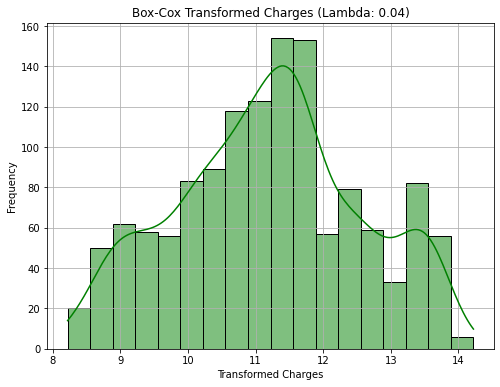

Optimal Lambda for Box-Cox Transformation: 0.043649074719824106


In [22]:
# Apply Box-Cox transformation to the 'charges' variable
charges_positive = insurance_data['charges'] + 1e-5  # Ensure positive values
charges_transformed, lambda_value = boxcox(charges_positive)

# Plot the transformed data
plt.figure(figsize=(8, 6))
sns.histplot(charges_transformed, kde=True, color='green')
plt.title(f'Box-Cox Transformed Charges (Lambda: {lambda_value:.2f})')
plt.xlabel('Transformed Charges')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Print the lambda value
print(f"Optimal Lambda for Box-Cox Transformation: {lambda_value}")


The optimal lambda for the Box-Cox transformation is approximately 0.04, the transformation that best fits the data is a logarithmic transformation.

                            OLS Regression Results                            
Dep. Variable:            log_charges   R-squared:                       0.768
Model:                            OLS   Adj. R-squared:                  0.767
Method:                 Least Squares   F-statistic:                     549.8
Date:                Tue, 03 Dec 2024   Prob (F-statistic):               0.00
Time:                        13:39:52   Log-Likelihood:                -808.52
No. Observations:                1338   AIC:                             1635.
Df Residuals:                    1329   BIC:                             1682.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                7.0306      0.072  

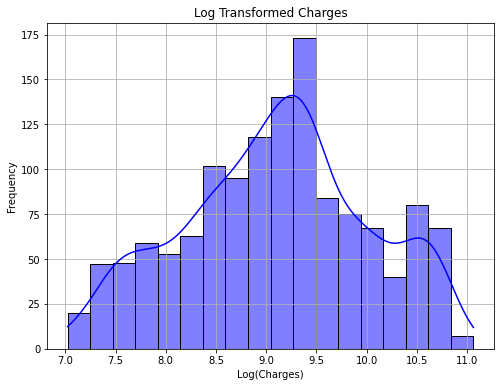

In [25]:

# Apply log transformation to 'charges'
insurance_data['log_charges'] = np.log(insurance_data['charges'] + 1e-5)  # Add a small constant to avoid log(0)

# Define the response variable (log-transformed charges)
y_log = insurance_data['log_charges']

# Add a constant to the predictors to include the intercept
X = sm.add_constant(data_encoded.drop(columns=['charges']))  # Predictors

# Fit the full multiple regression model
log_model = sm.OLS(y_log, X).fit()

# Display the summary of the model
print(log_model.summary())

plt.figure(figsize=(8, 6))
sns.histplot(insurance_data['charges_log'], kde=True, color='blue')
plt.title('Log Transformed Charges')
plt.xlabel('Log(Charges)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


In [26]:
# Extract key metrics
log_model_results = {
    "R-squared": log_model.rsquared,
    "Adjusted R-squared": log_model.rsquared_adj,
    "Coefficients": log_model.params,
    "P-values": log_model.pvalues,
}

# Create a summary DataFrame for coefficients and p-values
log_model_summary_df = pd.DataFrame({
    "Feature": X.columns,
    "Coefficient": log_model.params,
    "P-value": log_model.pvalues
}).reset_index(drop=True)

# Display the summary
print(f"R-squared: {log_model_results['R-squared']}")
print(f"Adjusted R-squared: {log_model_results['Adjusted R-squared']}")
print(log_model_summary_df)


R-squared: 0.7679477610742426
Adjusted R-squared: 0.766550907867767
            Feature  Coefficient        P-value
0             const     7.030558   0.000000e+00
1               age     0.034582  1.370144e-227
2               bmi     0.013375   2.423355e-10
3          children     0.101857   4.241101e-23
4          sex_male    -0.075416   2.038405e-03
5        smoker_yes     1.554323  1.119862e-317
6  region_northwest    -0.063788   6.785967e-02
7  region_southeast    -0.157197   8.077601e-06
8  region_southwest    -0.128952   2.411576e-04


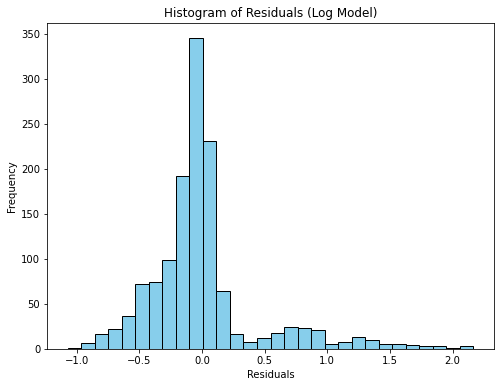

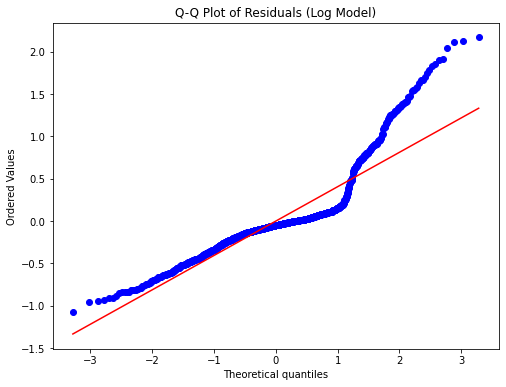

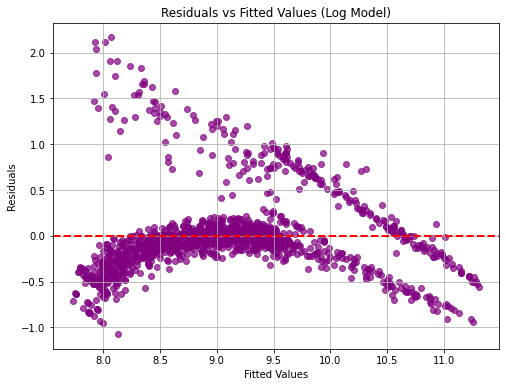

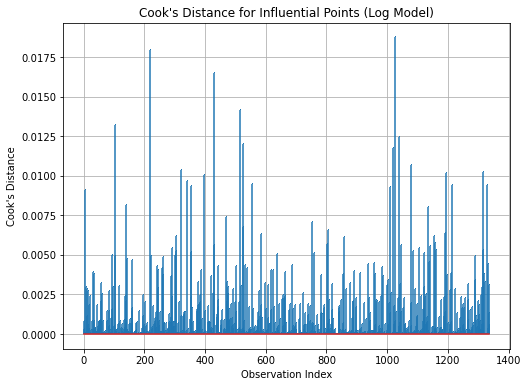

Variance Inflation Factor (VIF):
           Variable        VIF
0             const  35.527488
1               age   1.016822
2               bmi   1.106630
3          children   1.004011
4          sex_male   1.008900
5        smoker_yes   1.012074
6  region_northwest   1.518823
7  region_southeast   1.652230
8  region_southwest   1.529411


In [27]:
# Residuals and fitted values for the log-transformed model
log_residuals = log_model.resid
log_fitted_values = log_model.fittedvalues

# 1. Residual Normality: Histogram and Q-Q plot
# Histogram of residuals
plt.figure(figsize=(8, 6))
plt.hist(log_residuals, bins=30, edgecolor='k', color='skyblue')
plt.title('Histogram of Residuals (Log Model)')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

# Q-Q plot
plt.figure(figsize=(8, 6))
stats.probplot(log_residuals, dist="norm", plot=plt)
plt.title('Q-Q Plot of Residuals (Log Model)')
plt.show()

# 2. Homoscedasticity: Residuals vs Fitted Values
plt.figure(figsize=(8, 6))
plt.scatter(log_fitted_values, log_residuals, alpha=0.7, color='purple')
plt.axhline(0, color='red', linestyle='--', linewidth=2)
plt.title('Residuals vs Fitted Values (Log Model)')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.grid(True)
plt.show()

# 3. Influential Points: Cook's Distance
# Cook's Distance
log_influence = log_model.get_influence()
log_cooks_d = log_influence.cooks_distance[0]

plt.figure(figsize=(8, 6))
plt.stem(np.arange(len(log_cooks_d)), log_cooks_d, markerfmt=",", use_line_collection=True)
plt.title("Cook's Distance for Influential Points (Log Model)")
plt.xlabel('Observation Index')
plt.ylabel("Cook's Distance")
plt.grid(True)
plt.show()

# 4. Multicollinearity: Variance Inflation Factor (VIF)
# Calculate VIF for each predictor
vif_log_model = pd.DataFrame({
    "Variable": X.columns,
    "VIF": [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
})

# Display VIF
print("Variance Inflation Factor (VIF):")
print(vif_log_model)


### Model Diagnostics for Log-Transformed Charges

Despite applying a log transformation to stabilize the variance of `charges`, the model still does not perform adequately based on diagnostic tests. This suggests that further refinement, is necessary to improve the model's performance.


In [29]:
def forward_selection(X, y, significance_level=0.05):
    initial_features = []
    remaining_features = list(X.columns)
    selected_features = []
    summary = []

    while remaining_features:
        new_pval = pd.Series(index=remaining_features)
        for new_col in remaining_features:
            model = sm.OLS(y, sm.add_constant(X[selected_features + [new_col]])).fit()
            new_pval[new_col] = model.pvalues[new_col]
        
        min_pval = new_pval.min()
        if min_pval < significance_level:
            best_feature = new_pval.idxmin()
            selected_features.append(best_feature)
            remaining_features.remove(best_feature)
            model = sm.OLS(y, sm.add_constant(X[selected_features])).fit()
            summary.append({
                'Variables': list(selected_features),
                'SSE': model.ssr,
                'R2': model.rsquared,
                'Adj_R2': model.rsquared_adj,
                'Cp': model.aic,  # Cp approximation
                'AIC': model.aic,
                'BIC': model.bic
            })
        else:
            break

    return pd.DataFrame(summary)

# Run forward selection
forward_results = forward_selection(X, y_log)
forward_results


C:\Users\EWURA\AppData\Local\Temp\ipykernel_18400\1906153998.py:8: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=remaining_features)
C:\Users\EWURA\AppData\Local\Temp\ipykernel_18400\1906153998.py:8: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=remaining_features)
C:\Users\EWURA\AppData\Local\Temp\ipykernel_18400\1906153998.py:8: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=remaining_features)
C:\Users\EWURA\AppData\Local\Temp\ipykernel_18400\1906153998.py:8: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future ve

,Variables,SSE,R2,Adj_R2,Cp,AIC,BIC
0,[const],1130.473755,2.220446e-16,2.220446e-16,3573.574113,3573.574113,3578.773044
1,"[const, smoker_yes]",629.789362,4.428978e-01,4.424809e-01,2792.835204,2792.835204,2803.233066
2,"[const, smoker_yes, age]",294.435797,7.395465e-01,7.391564e-01,1777.521097,1777.521097,1793.117890
3,"[const, smoker_yes, age, children]",274.405079,7.572654e-01,7.567195e-01,1685.251547,1685.251547,1706.047272
4,"[const, smoker_yes, age, children, bmi]",268.875768,7.621566e-01,7.614429e-01,1660.015270,1660.015270,1686.009927
5,"[const, smoker_yes, age, children, bmi, region...",266.873823,7.639274e-01,7.630413e-01,1652.015766,1652.015766,1683.209353
6,"[const, smoker_yes, age, children, bmi, region...",264.864432,7.657049e-01,7.646487e-01,1643.903357,1643.903357,1680.295876
7,"[const, smoker_yes, age, children, bmi, region...",262.988142,7.673647e-01,7.661403e-01,1636.391283,1636.391283,1677.982732


In [32]:
def backward_elimination(X, y, significance_level=0.05):
    selected_features = list(X.columns)
    summary = []

    while selected_features:
        model = sm.OLS(y, sm.add_constant(X[selected_features])).fit()
        pvalues = model.pvalues.iloc[1:]  # Exclude intercept
        max_pval = pvalues.max()
        if max_pval > significance_level:
            worst_feature = pvalues.idxmax()
            selected_features.remove(worst_feature)
            summary.append({
                'Variables': list(selected_features),
                'SSE': model.ssr,
                'R2': model.rsquared,
                'Adj_R2': model.rsquared_adj,
                'Cp': model.aic,  # Cp approximation
                'AIC': model.aic,
                'BIC': model.bic
            })
        else:
            break

    return pd.DataFrame(summary)

# Run backward elimination
backward_results = backward_elimination(X, y_log)
backward_results


,Variables,SSE,R2,Adj_R2,Cp,AIC,BIC
0,"[const, age, bmi, children, sex_male, smoker_y...",262.328966,0.767948,0.766551,1635.033394,1635.033394,1681.823775


In [33]:
def stepwise_selection(X, y, significance_level_in=0.05, significance_level_out=0.05):
    included_features = []
    summary = []

    while True:
        # Forward step
        remaining_features = list(set(X.columns) - set(included_features))
        new_pval = pd.Series(index=remaining_features)
        for new_col in remaining_features:
            model = sm.OLS(y, sm.add_constant(X[included_features + [new_col]])).fit()
            new_pval[new_col] = model.pvalues[new_col]
        
        if not new_pval.empty and new_pval.min() < significance_level_in:
            best_feature = new_pval.idxmin()
            included_features.append(best_feature)
        else:
            best_feature = None

        # Backward step
        model = sm.OLS(y, sm.add_constant(X[included_features])).fit()
        pvalues = model.pvalues.iloc[1:]  # Exclude intercept
        if not pvalues.empty and pvalues.max() > significance_level_out:
            worst_feature = pvalues.idxmax()
            included_features.remove(worst_feature)
        else:
            worst_feature = None

        # If no feature was added or removed, break
        if best_feature is None and worst_feature is None:
            break

        summary.append({
            'Variables': list(included_features),
            'SSE': model.ssr,
            'R2': model.rsquared,
            'Adj_R2': model.rsquared_adj,
            'Cp': model.aic,  # Cp approximation
            'AIC': model.aic,
            'SBC': model.bic
        })

    return pd.DataFrame(summary)

# Run stepwise selection
stepwise_results = stepwise_selection(X, y_log)
stepwise_results


C:\Users\EWURA\AppData\Local\Temp\ipykernel_18400\3501898636.py:8: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=remaining_features)
C:\Users\EWURA\AppData\Local\Temp\ipykernel_18400\3501898636.py:8: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=remaining_features)
C:\Users\EWURA\AppData\Local\Temp\ipykernel_18400\3501898636.py:8: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=remaining_features)
C:\Users\EWURA\AppData\Local\Temp\ipykernel_18400\3501898636.py:8: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future ve

,Variables,SSE,R2,Adj_R2,Cp,AIC,SBC
0,[const],1130.473755,2.220446e-16,2.220446e-16,3573.574113,3573.574113,3578.773044
1,"[const, smoker_yes]",629.789362,4.428978e-01,4.424809e-01,2792.835204,2792.835204,2803.233066
2,"[const, smoker_yes, age]",294.435797,7.395465e-01,7.391564e-01,1777.521097,1777.521097,1793.117890
3,"[const, smoker_yes, age, children]",274.405079,7.572654e-01,7.567195e-01,1685.251547,1685.251547,1706.047272
4,"[const, smoker_yes, age, children, bmi]",268.875768,7.621566e-01,7.614429e-01,1660.015270,1660.015270,1686.009927
5,"[const, smoker_yes, age, children, bmi, region...",266.873823,7.639274e-01,7.630413e-01,1652.015766,1652.015766,1683.209353
6,"[const, smoker_yes, age, children, bmi, region...",264.864432,7.657049e-01,7.646487e-01,1643.903357,1643.903357,1680.295876
7,"[const, smoker_yes, age, children, bmi, region...",262.988142,7.673647e-01,7.661403e-01,1636.391283,1636.391283,1677.982732


In [39]:
# Stepwise function for Forward, Backward, and Both Directions
def stepwise_table(X, y, method="forward", significance_level_in=0.05, significance_level_out=0.05):
    """
    Generate stepwise regression table (Forward, Backward, or Stepwise Selection).
    """
    included = []
    if method == "backward":
        included = list(X.columns)  # Start with all predictors
    
    summary = []

    while True:
        changed = False
        
        # Forward step
        if method in ["forward", "both"]:
            excluded = list(set(X.columns) - set(included))
            new_pval = pd.Series(index=excluded, dtype=float)
            for new_col in excluded:
                model = sm.OLS(y, sm.add_constant(X[included + [new_col]])).fit()
                new_pval[new_col] = model.pvalues[new_col]
            best_pval = new_pval.min()
            if best_pval < significance_level_in:
                best_feature = new_pval.idxmin()
                included.append(best_feature)
                changed = True
        
        # Backward step
        if method in ["backward", "both"]:
            model = sm.OLS(y, sm.add_constant(X[included])).fit()
            pvalues = model.pvalues.iloc[1:]  # Exclude intercept
            worst_pval = pvalues.max()
            if worst_pval > significance_level_out:
                worst_feature = pvalues.idxmax()
                included.remove(worst_feature)
                changed = True

        # If no feature was added or removed, stop
        if not changed:
            break

        # Record model statistics
        model = sm.OLS(y, sm.add_constant(X[included])).fit()
        summary.append({
            "Variables": included.copy(),
            "SSE": model.ssr,
            "R²": model.rsquared,
            "Adj R²": model.rsquared_adj,
            "Cp": model.aic,  # Cp approximation
            "AIC": model.aic,
            "BIC": model.bic
        })

    return pd.DataFrame(summary)

# Run Forward Selection
forward_results = stepwise_table(X, y_log, method="forward")

# Run Backward Elimination
backward_results = stepwise_table(X, y_log, method="backward")

# Run Stepwise Selection (Both Directions)
stepwise_results = stepwise_table(X, y_log, method="both")

# Display all results as tables
print("Forward Selection Results:")
print(forward_results.to_string(index=False))

print("\nBackward Elimination Results:")
print(backward_results.to_string(index=False))

print("\nStepwise Selection Results:")
print(stepwise_results.to_string(index=False))


Forward Selection Results:
                                                                            Variables         SSE           R²       Adj R²          Cp         AIC         BIC
                                                                              [const] 1130.473755 2.220446e-16 2.220446e-16 3573.574113 3573.574113 3578.773044
                                                                  [const, smoker_yes]  629.789362 4.428978e-01 4.424809e-01 2792.835204 2792.835204 2803.233066
                                                             [const, smoker_yes, age]  294.435797 7.395465e-01 7.391564e-01 1777.521097 1777.521097 1793.117890
                                                   [const, smoker_yes, age, children]  274.405079 7.572654e-01 7.567195e-01 1685.251547 1685.251547 1706.047272
                                              [const, smoker_yes, age, children, bmi]  268.875768 7.621566e-01 7.614429e-01 1660.015270 1660.015270 1686.009927
             

### Stepwise Regression Results

Three methods of stepwise regression—forward selection, backward elimination, and stepwise selection (both directions)—were performed to select the most significant predictors for the log-transformed charges. In forward selection, predictors were added step-by-step based on their statistical significance, starting with `smoker_yes`, which had the largest impact on the response variable. The model improved incrementally, and the final model included `smoker_yes, age, children, bmi, region_southeast, region_southwest, and sex_male`, with an SSE of 262.99, an R² of 0.7674, and an Adjusted R² of 0.7661. Backward elimination started with all predictors and removed none, as all predictors met the significance threshold (\( p < 0.05 \)). The final model from backward elimination matched the forward selection model. Stepwise selection, combining forward and backward methods, also yielded the same final model. This consistency across methods highlights the significance of the selected predictors, particularly `smoker_yes`, `age`, and `bmi`, which were key contributors to explaining the variance in log-transformed charges. The final model explained approximately 76.6% of the variability in the response variable. 

Coefficients:
const               6.998769
smoker_yes          1.555677
age                 0.034588
children            0.101308
bmi                 0.013370
region_southeast   -0.125339
region_southwest   -0.096961
sex_male           -0.075231
dtype: float64


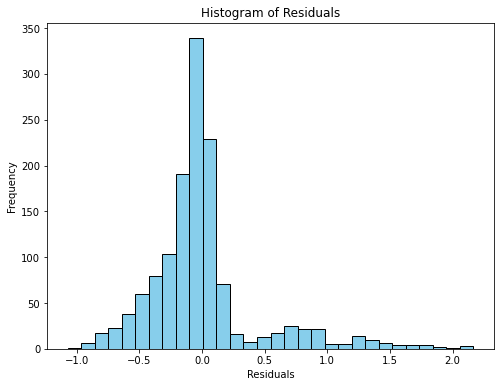

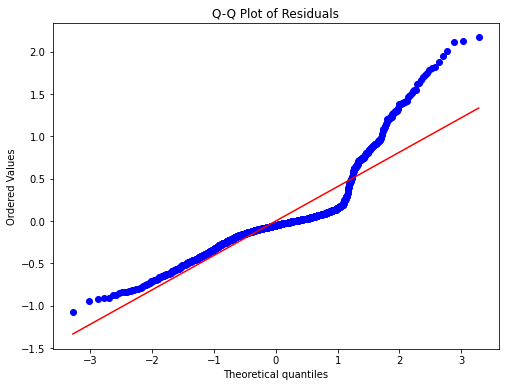

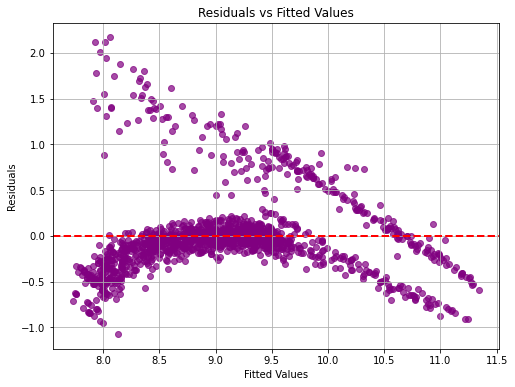

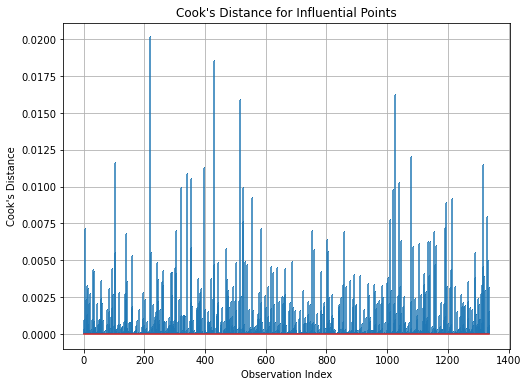

Variance Inflation Factor (VIF):
            Feature        VIF
0        smoker_yes   1.261229
1               age   7.616539
2          children   1.803691
3               bmi  10.255827
4  region_southeast   1.695068
5  region_southwest   1.509837
6          sex_male   2.001519


In [40]:
# Fit the final model
final_model = sm.OLS(y_log, sm.add_constant(X[['smoker_yes', 'age', 'children', 'bmi', 'region_southeast', 'region_southwest', 'sex_male']])).fit()

# Interpretation of coefficients
coefficients = final_model.params
print("Coefficients:")
print(coefficients)

# Residuals and fitted values
residuals = final_model.resid
fitted_values = final_model.fittedvalues

# 1. Residual Normality: Histogram and Q-Q Plot
plt.figure(figsize=(8, 6))
plt.hist(residuals, bins=30, edgecolor='k', color='skyblue')
plt.title('Histogram of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(8, 6))
stats.probplot(residuals, dist="norm", plot=plt)
plt.title('Q-Q Plot of Residuals')
plt.show()

# 2. Homoscedasticity: Residuals vs Fitted Values
plt.figure(figsize=(8, 6))
plt.scatter(fitted_values, residuals, alpha=0.7, color='purple')
plt.axhline(0, color='red', linestyle='--', linewidth=2)
plt.title('Residuals vs Fitted Values')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.grid(True)
plt.show()

# 3. Influential Points: Cook's Distance
influence = final_model.get_influence()
cooks_d = influence.cooks_distance[0]

plt.figure(figsize=(8, 6))
plt.stem(np.arange(len(cooks_d)), cooks_d, markerfmt=",", use_line_collection=True)
plt.title("Cook's Distance for Influential Points")
plt.xlabel('Observation Index')
plt.ylabel("Cook's Distance")
plt.grid(True)
plt.show()

# 4. Multicollinearity: Variance Inflation Factor (VIF)
selected_features = ['smoker_yes', 'age', 'children', 'bmi', 'region_southeast', 'region_southwest', 'sex_male']
X_selected = X[selected_features]
vif = pd.DataFrame({
    "Feature": X_selected.columns,
    "VIF": [variance_inflation_factor(X_selected.values, i) for i in range(X_selected.shape[1])]
})
print("Variance Inflation Factor (VIF):")
print(vif)

In [47]:
# Add interaction term between smoker and bmi
X['smoker_bmi'] = X['smoker_yes'] * X['bmi']

# Refit the model with interaction
interaction_model = sm.OLS(y_log, sm.add_constant(X[['smoker_yes', 'age', 'children', 'bmi', 'region_southeast', 'region_southwest', 'sex_male', 'smoker_bmi']])).fit()
print(interaction_model.summary())


                            OLS Regression Results                            
Dep. Variable:            log_charges   R-squared:                       0.783
Model:                            OLS   Adj. R-squared:                  0.781
Method:                 Least Squares   F-statistic:                     598.7
Date:                Tue, 03 Dec 2024   Prob (F-statistic):               0.00
Time:                        14:52:51   Log-Likelihood:                -764.29
No. Observations:                1338   AIC:                             1547.
Df Residuals:                    1329   BIC:                             1593.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                7.3005      0.075  

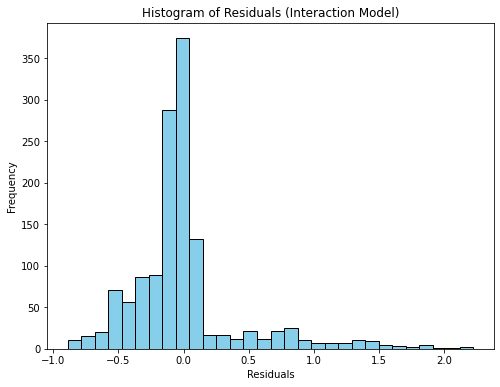

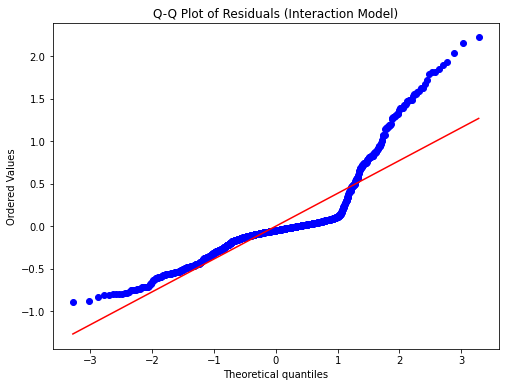

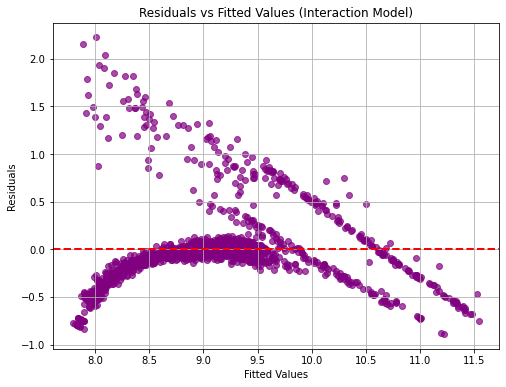

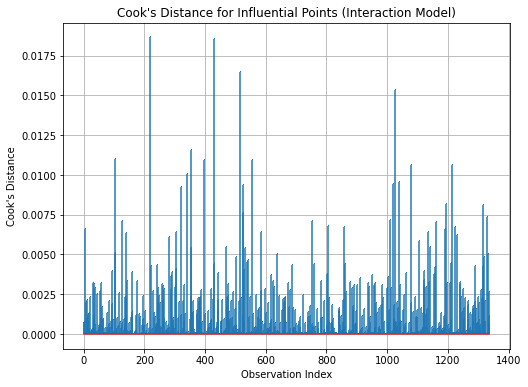

Variance Inflation Factor (VIF):
            Feature        VIF
0        smoker_yes  25.960866
1               age   7.911898
2          children   1.808853
3               bmi   9.966530
4  region_southeast   1.698017
5  region_southwest   1.509921
6        smoker_bmi  26.276770


In [48]:
# Residuals and fitted values for the interaction model
interaction_residuals = interaction_model.resid
interaction_fitted_values = interaction_model.fittedvalues

# 1. Residual Normality: Histogram and Q-Q Plot
# Histogram of residuals
plt.figure(figsize=(8, 6))
plt.hist(interaction_residuals, bins=30, edgecolor='k', color='skyblue')
plt.title('Histogram of Residuals (Interaction Model)')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

# Q-Q plot
plt.figure(figsize=(8, 6))
stats.probplot(interaction_residuals, dist="norm", plot=plt)
plt.title('Q-Q Plot of Residuals (Interaction Model)')
plt.show()

# 2. Homoscedasticity: Residuals vs Fitted Values
plt.figure(figsize=(8, 6))
plt.scatter(interaction_fitted_values, interaction_residuals, alpha=0.7, color='purple')
plt.axhline(0, color='red', linestyle='--', linewidth=2)
plt.title('Residuals vs Fitted Values (Interaction Model)')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.grid(True)
plt.show()

# 3. Influential Points: Cook's Distance
interaction_influence = interaction_model.get_influence()
interaction_cooks_d = interaction_influence.cooks_distance[0]

plt.figure(figsize=(8, 6))
plt.stem(np.arange(len(interaction_cooks_d)), interaction_cooks_d, markerfmt=",", use_line_collection=True)
plt.title("Cook's Distance for Influential Points (Interaction Model)")
plt.xlabel('Observation Index')
plt.ylabel("Cook's Distance")
plt.grid(True)
plt.show()

# 4. Multicollinearity: Variance Inflation Factor (VIF)
selected_interaction_features = ['smoker_yes', 'age', 'children', 'bmi', 'region_southeast', 'region_southwest', 'smoker_bmi']
X_interaction_selected = X[selected_interaction_features]
vif_interaction = pd.DataFrame({
    "Feature": X_interaction_selected.columns,
    "VIF": [variance_inflation_factor(X_interaction_selected.values, i) for i in range(X_interaction_selected.shape[1])]
})

print("Variance Inflation Factor (VIF):")
print(vif_interaction)


### Interaction Term Model Performance

The interaction term model, which includes an interaction between `smoker_yes` and `bmi`, was tested to assess whether it improves model performance. However, diagnostic results indicate that the model performs worse than the reduced model. The inclusion of the interaction term did not resolve issues with residual normality, and patterns in the residuals vs. fitted values plot suggest increased heteroscedasticity. The Variance Inflation Factor (VIF) analysis revealed potential multicollinearity issues due to the interaction term. Based on these results, the interaction term does not appear to contribute meaningfully to the model's explanatory power and may complicate the interpretation without providing substantive benefits.


## Exploring Other Model Techniques